In [1]:
import PIL.Image
import PIL.ImageDraw

In [2]:
def create_palette(palette_fun, color_count):
    return list(map(palette_fun, range(color_count)))

def create_swatch(palette):
    size = 32
    w = size * len(palette)
    h = size
    
    img = PIL.Image.new("RGB", (w, h))
    draw = PIL.ImageDraw.Draw(img)
    
    for i, rgb in enumerate(palette):
        draw.rectangle([i * size, 0, (i + 1) * size, h], fill=rgb)
        
    return img

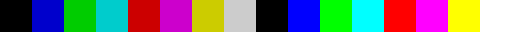

In [12]:
def zxspectrum_reordered(num):
    """ Based on https://en.wikipedia.org/wiki/ZX_Spectrum_graphic_modes, but switched g and r channel to be better
    comparable to CGA """
    b = num & 0x1
    g = (num >> 1) & 0x1
    r = (num >> 2) & 0x1
    i = (num >> 3) & 0x1
    
    scale = 0xcc + 0x33 * i
    
    return (r * scale, g * scale, b * scale)
create_swatch(create_palette(zxspectrum_reordered, 16))

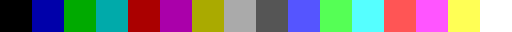

In [13]:
def cga_unpatched(num):
    """ Based on https://en.wikipedia.org/wiki/Color_Graphics_Adapter#With_an_RGBI_monitor,
    but without special treatment for color 6. """
    b = num & 0x1
    g = (num >> 1) & 0x1
    r = (num >> 2) & 0x1
    i = (num >> 3) & 0x1
    
    scale = 2 * 255 / 3
    offset = i * 255 / 3
    
    return tuple(round(x * scale + offset) for x in (r, g, b))
create_swatch(create_palette(cga_unpatched, 16))

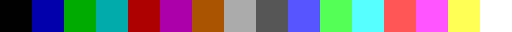

In [14]:
def cga(num):
    """ Based on https://en.wikipedia.org/wiki/Color_Graphics_Adapter#With_an_RGBI_monitor """
    if num == 6:
        return (0xaa, 0x55, 0x00)
    b = num & 0x1
    g = (num >> 1) & 0x1
    r = (num >> 2) & 0x1
    i = (num >> 3) & 0x1
    
    scale = 2 * 255 / 3
    offset = i * 255 / 3
    
    return tuple(round(x * scale + offset) for x in (r, g, b))
create_swatch(create_palette(cga, 16))

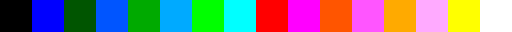

In [15]:
def rgb121(num):
    """ 16 color palette with 2 bits for green channel"""
    b = num & 0x1
    g = (num >> 1) & 0x3
    r = (num >> 3) & 0x1
    
    return (r * 255, round(g * 255 / 3), b * 255)
create_swatch(create_palette(rgb121, 16))